# HW 2: Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file.

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!

### Grading
This homework is due Feb. 21, 2019 by 4:00pm Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

Code Quality - 10%

Storytelling - 10%

Result on Kaggle - 5%

Describing, Cleaning, and Visualizing data - 25%

Modeling - 50%

More specifically, for modeling we will look for:

Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?
Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
#import the csv files
train = pd.read_csv("/Users/alexhumble/Desktop/train.csv",
                   low_memory =False)
test = pd.read_csv("/Users/alexhumble/Desktop/test.csv",
                  low_memory =False)

In [3]:
#inspect the data to see if there are missing values, the columns, etc.
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Skewness

In [4]:
#All columns suffering from skewness greater than 67% will be aggregated in the training set
drop = []

for ii in train:
    if train[ii].value_counts(normalize=True, dropna=False).iloc[0] > .67:
        drop.append(ii)

In [5]:
#Columns above 67% skewness will be dropped
train1 = train.drop(drop, axis = 1)
test1 = test.drop(drop, axis = 1)

In [6]:
train1.shape

(1460, 45)

In [7]:
test1.shape

(1459, 44)

## Fill Missing Values

In [8]:
#These represent subsets of the categorical and quantifiable data within the train dataset
cat = train1.select_dtypes(include = ['object'])
dog = train1.select_dtypes(exclude = ['object'])

#These represent subsets of the categorical and quantifiable data within the test dataset
kitten = test1.select_dtypes(include=['object'])
puppy = test1.select_dtypes(exclude= ['object'])

In [9]:
cat.describe()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
count,1460,1460,1460,1460,1460,1452,1460,1460,1423,1422,1423,1460,1460,770,1379,1379
unique,4,25,8,15,16,4,4,6,4,4,6,5,4,5,6,3
top,Reg,NAmes,1Story,VinylSd,VinylSd,None,TA,PConc,TA,No,Unf,Ex,TA,Gd,Attchd,Unf
freq,925,225,726,515,504,864,906,647,649,953,430,741,735,380,870,605


In [10]:
#As seen above, we are missing data in any column without 1460 observations, here we will aggregate columns with missing values
missing_cat = []
for aa in cat:
    if cat[aa].isnull().any() == True:
        missing_cat.append(aa)
        

In [11]:
#Each of these columns suffers from missing data
missing_cat

['MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [12]:
#Nan values for these categorical columns indicate there isnt that feature in the home. They will be classified as "none"
found_cat = cat.fillna(value = "None")

In [13]:
#All missing values have been filled
found_cat.describe()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,4,25,8,15,16,4,4,6,5,5,7,5,4,6,7,4
top,Reg,NAmes,1Story,VinylSd,VinylSd,None,TA,PConc,TA,No,Unf,Ex,TA,None,Attchd,Unf
freq,925,225,726,515,504,872,906,647,649,953,430,741,735,690,870,605


In [14]:
#The same process with the test dataset - filling columns with missing values
missing_kitten = []
for aa in kitten:
    if kitten[aa].isnull().any() == True:
        missing_kitten.append(aa)

In [15]:
missing_kitten

['Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

Exterior1st, Exterior2nd and KitchenQual are columns with nan values in the test dataset and not the train dataset

In [16]:
#None is not an adequate row value for these columns
kitten.Exterior1st.values

array(['VinylSd', 'Wd Sdng', 'VinylSd', ..., 'VinylSd', 'HdBoard',
       'HdBoard'], dtype=object)

In [17]:
kitten.Exterior2nd.values

array(['VinylSd', 'Wd Sdng', 'VinylSd', ..., 'VinylSd', 'Wd Shng',
       'HdBoard'], dtype=object)

In [18]:
kitten.KitchenQual.values

array(['TA', 'Gd', 'TA', ..., 'TA', 'TA', 'TA'], dtype=object)

In [19]:
#I am going to fill these nan values with the most frequently occurring value for each column
kitten.Exterior1st.describe()

count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object

In [20]:
kitten.Exterior2nd.describe()

count        1458
unique         15
top       VinylSd
freq          510
Name: Exterior2nd, dtype: object

In [21]:
kitten.KitchenQual.describe()

count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

In [22]:
#After seeing which values occur most frequently in those columns, fill the missing columns with the appropriate value
found_kitten = kitten.fillna(value = {
    "Exterior1st": "VinylSd",
    "Exterior2nd": "VinylSd",
    "MasVnrType": "None",
   "BsmtQual": "None",
 "BsmtExposure": "None",
 "BsmtFinType1": "None",
 "KitchenQual": "TA",
 "FireplaceQu": "None",
 "GarageType": "None",
 "GarageFinish": "None"   
    })

### Quantifiable data

In [23]:
#check for missing values amongst the numerical variables
dog.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [24]:
#all columns with missing values aggregated
found_dog = []
for ll in dog:
    if dog[ll].isnull().any() == True:
        found_dog.append(ll)

    

In [25]:
#Shows important information about the variables with missing values
dog[found_dog].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [26]:
#Same process with the test data - aggregate the columns that have missing values
found_puppy = []
for jj in puppy:
    if puppy[jj].isnull().any() == True:
        found_puppy.append(jj)
found_puppy

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [27]:
#The variables are continuous numerical values, thus I use an imputer to insert values for the missing values
fill = Imputer()
dog_food = fill.fit_transform(dog)
puppy_bites = fill.fit_transform(puppy)

In [28]:
#Using the imputer feature eliminates the column names; here, I am restoring the column names from before
dog_house = []
for rr in dog:
    dog_house.append(rr)
    
puppy_barn = []
for pp in puppy:
    puppy_barn.append(pp)

In [29]:
#The new dataframes now have the imputed values and correct column names
df_GD = pd.DataFrame(dog_food, columns = dog_house)

df_pomski = pd.DataFrame(puppy_bites, columns = puppy_barn)

In [30]:
#describe just to make sure the missing values have been added
df_GD[found_dog].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,70.049958,103.685262,1978.506164
std,22.024023,180.569112,23.994583
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,70.049958,0.000000,1978.506164
75%,79.000000,164.250000,2001.000000
max,313.000000,1600.000000,2010.000000


### Putting the Data Back Together

In [31]:
cats_dogs = pd.concat([df_GD,found_cat], axis =1)
kitties_puppies = pd.concat([df_pomski,found_kitten], axis =1)

In [32]:
cats_dogs.shape, kitties_puppies.shape

((1460, 45), (1459, 44))

In [33]:
# Both the categorical and the numeric data is back in the same dataframe
cats_dogs.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,None,Attchd,RFn
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [34]:
#Same thing here with the test DF - Both the categorical and the numeric data is back in the same dataframe
kitties_puppies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,TA,CBlock,TA,No,Rec,TA,TA,None,Attchd,Unf
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,TA,CBlock,TA,No,ALQ,TA,Gd,None,Attchd,Unf
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,TA,PConc,Gd,No,GLQ,Gd,TA,TA,Attchd,Fin
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,TA,PConc,TA,No,GLQ,Ex,Gd,Gd,Attchd,Fin
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,Gd,PConc,Gd,No,ALQ,Ex,Gd,None,Attchd,RFn


In [35]:
corr = cats_dogs.corr()

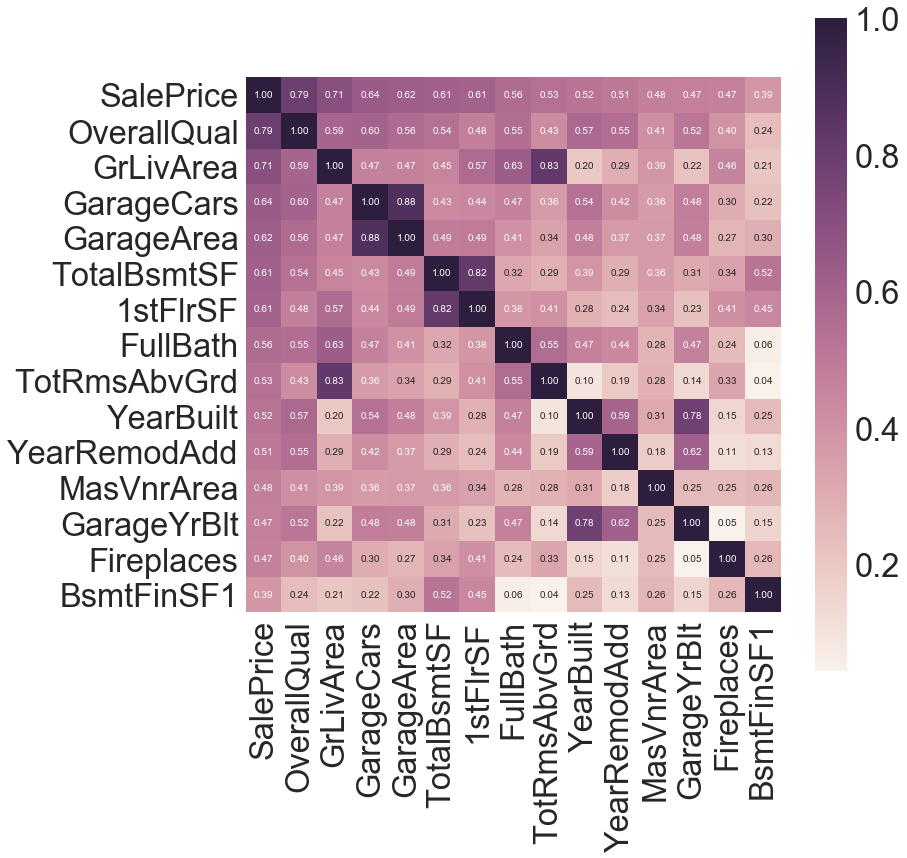

In [36]:
#Used to make a heatmap to see which variables are most correlated with sale price of homes
#also shows how strongly variables are with each other
k =15
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(cats_dogs[cols].values.T)
sns.set(font_scale=3.25)
f, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

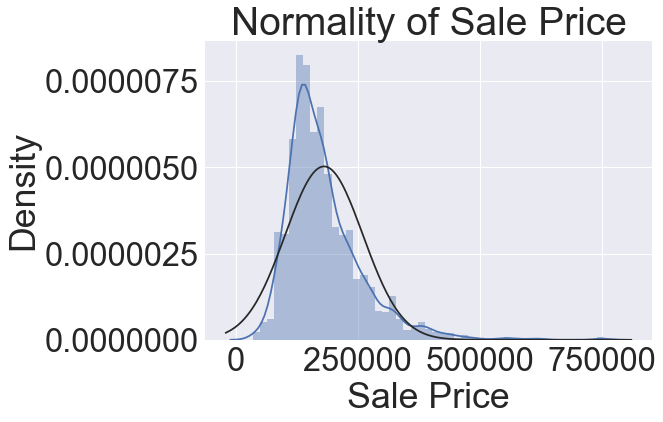

In [37]:
#Shows normality of Sale Price
sns.distplot(cats_dogs['SalePrice'], fit=norm)
plt.title("Normality of Sale Price")
plt.ylabel("Density")
plt.xlabel("Sale Price")
plt.show()

In [38]:
#Now we will take the log of the sale price and see how the distribution compares
cats_dogs.is_copy = False
cats_dogs['log_SalePrice'] = np.log(cats_dogs['SalePrice'])


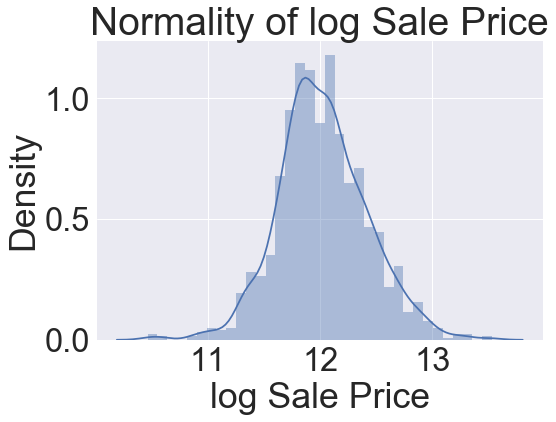

In [39]:
sns.distplot(cats_dogs['log_SalePrice'])
plt.title("Normality of log Sale Price")
plt.ylabel("Density")
plt.xlabel("log Sale Price")
plt.show()

The log of sale price is normally distributed and will be far easier to work with later on as we build the models.
This will be especially helpful for the linear regression model.

## Outliers 

Sensitivity to outliers causes us to access the data and see if there is a need to remove certain outliers that may
negatively impact our models later on.

In [40]:
out = cats_dogs.select_dtypes(exclude= ['object'])

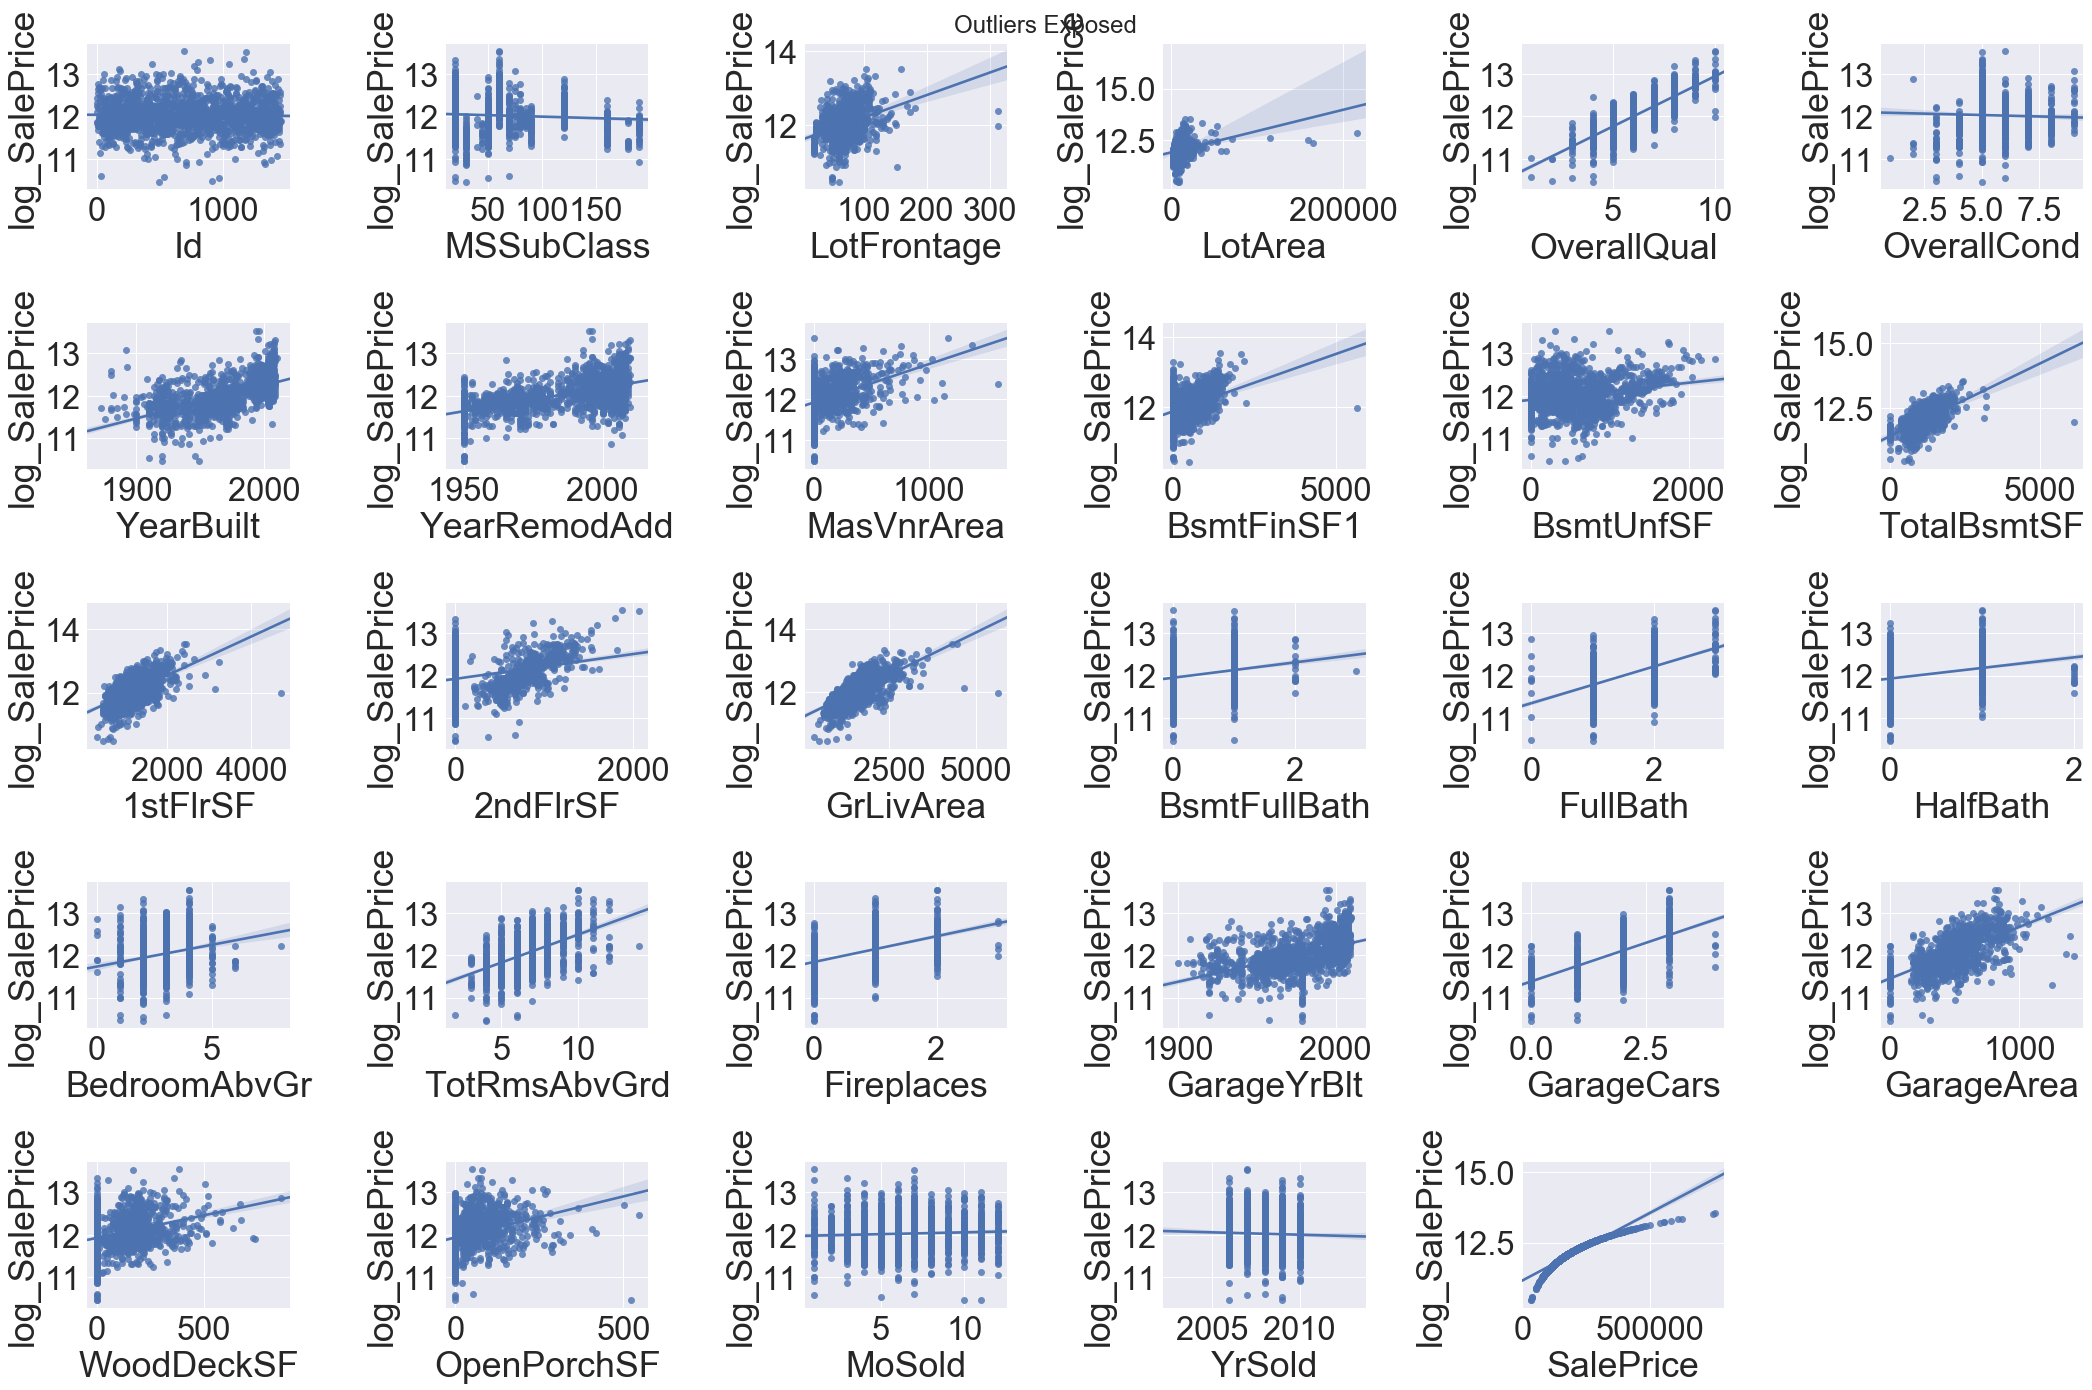

In [41]:
out1 = plt.figure(figsize=(30,20))
#This will create a regplot shoowing the log Sales Price and each variable
for i in np.arange(29):
    aa = out1.add_subplot(5,6,i+1)
    sns.regplot(x=out.iloc[:,i], y=cats_dogs['log_SalePrice'])
plt.tight_layout()    
plt.suptitle("Outliers Exposed", fontsize = 24)
plt.show()
    

In [42]:
#After visually seeing the outliers within the dataset, I have decided to remove the most serious offenders in order to
#clean the data and ensure that our models are not skewed by the outliers later on
cats_dogs = cats_dogs.drop(cats_dogs[(cats_dogs['1stFlrSF']>4000)].index)
cats_dogs = cats_dogs.drop(cats_dogs[(cats_dogs['LotFrontage']>300)].index)
cats_dogs = cats_dogs.drop(cats_dogs[(cats_dogs['BsmtFinSF1']>5000)].index)
cats_dogs = cats_dogs.drop(cats_dogs[(cats_dogs['OpenPorchSF']>500)
                                  & (cats_dogs['SalePrice']<11)].index)
cats_dogs = cats_dogs.drop(cats_dogs[(cats_dogs['TotalBsmtSF']>500)].index)
cats_dogs = cats_dogs.drop(cats_dogs[(cats_dogs['GrLivArea']>4000)
                                  & (cats_dogs['SalePrice']<12.5)].index)


I have an error somewhere in here but I cannot find it or figure out how to remove the outliers and not mess up my training crostt validation process

In [43]:
cats_dogs.shape, kitties_puppies.shape

((71, 46), (1459, 44))

In [44]:
outlier = cats_dogs.select_dtypes(exclude= ['object'])

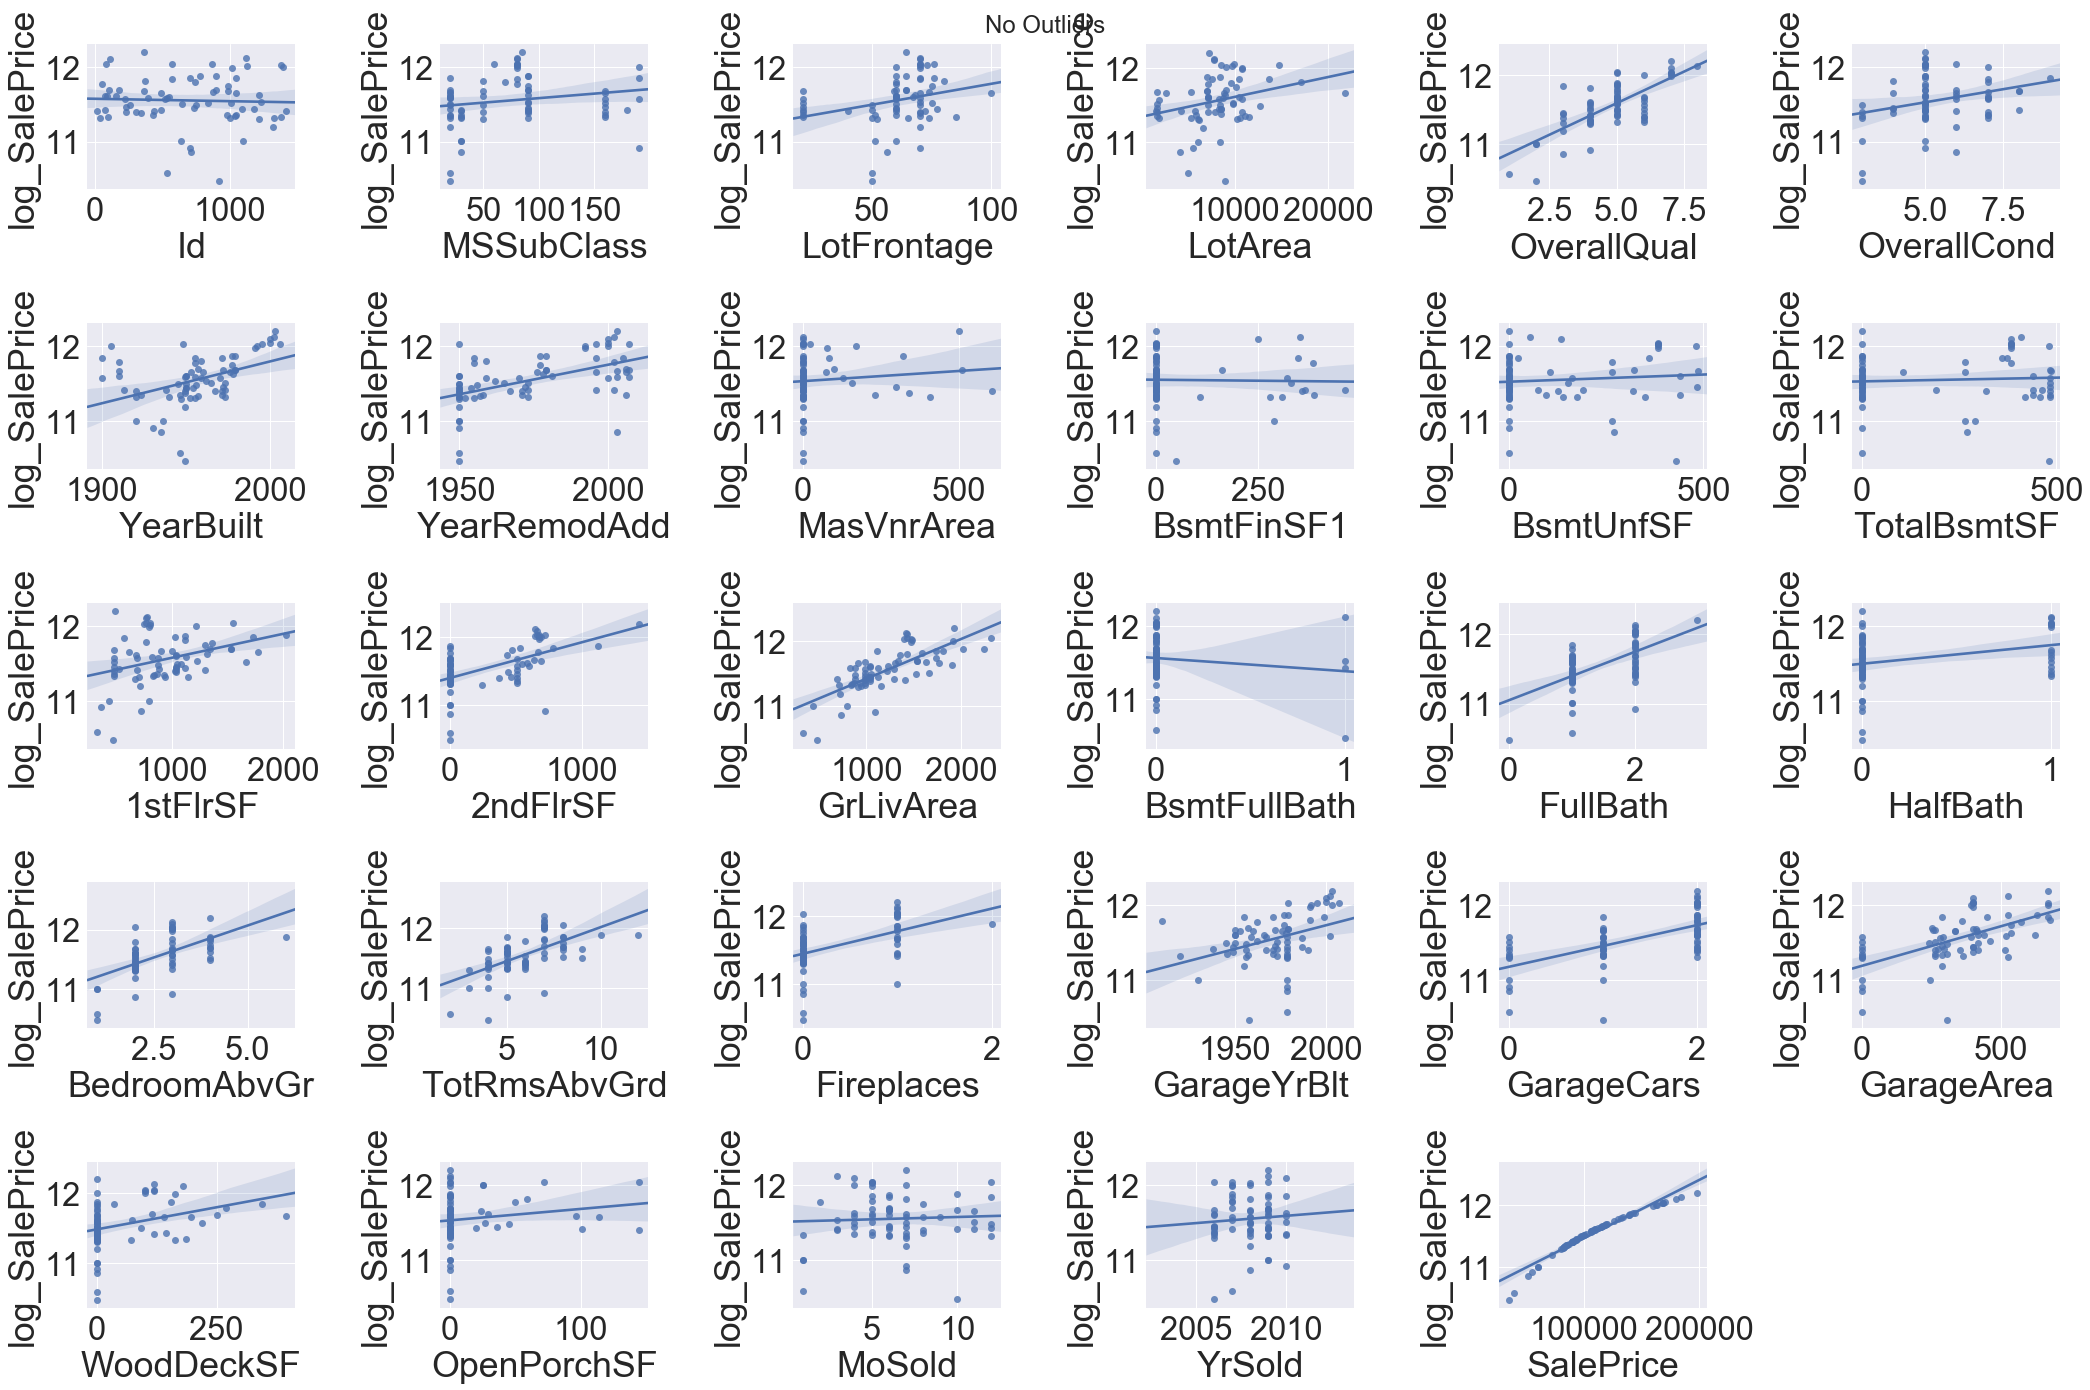

In [45]:
#Now we are able to see the same figures as above except this time the outliers are removed. Double check to make sure there
#are no remaining outliers
out = plt.figure(figsize=(30,20))
for i in np.arange(29):
    aa = out.add_subplot(5,6,i+1)
    sns.regplot(x=outlier.iloc[:,i], y=cats_dogs['log_SalePrice'])
plt.tight_layout()    
plt.suptitle("No Outliers", fontsize = 24)
plt.show()

In [46]:
#In order for the models to work, especially linear regression, it is imperative that we swap out the categorical variables
#Putting in dummy variables allows the models to run properly
cats_dogs10 = pd.get_dummies(cats_dogs)
#Moving forward we will be using log sale price, thus we can drop the sale price
cats_dogs2 = cats_dogs10.drop(['SalePrice'],axis=1)
kitties_puppies2 = pd.get_dummies(kitties_puppies)

In [47]:
#Each row value for categorical columns has become its own column with dummy variables inserted in
#Double check to make sure these categorical values are now numerical dummies
cats_dogs2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
17,18.0,90.0,72.0,10791.0,4.0,5.0,1967.0,1967.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
39,40.0,90.0,65.0,6040.0,4.0,5.0,1955.0,1955.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
54,55.0,80.0,60.0,7134.0,5.0,5.0,1955.0,1955.0,0.0,384.0,...,0,0,0,0,1,0,0,0,0,1
75,76.0,180.0,21.0,1596.0,4.0,5.0,1973.0,1973.0,0.0,462.0,...,0,0,1,0,0,0,0,0,0,1
79,80.0,50.0,60.0,10440.0,5.0,6.0,1910.0,1981.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
for num,i in enumerate(kitties_puppies2.columns):
    print(num,i)

0 Id
1 MSSubClass
2 LotFrontage
3 LotArea
4 OverallQual
5 OverallCond
6 YearBuilt
7 YearRemodAdd
8 MasVnrArea
9 BsmtFinSF1
10 BsmtUnfSF
11 TotalBsmtSF
12 1stFlrSF
13 2ndFlrSF
14 GrLivArea
15 BsmtFullBath
16 FullBath
17 HalfBath
18 BedroomAbvGr
19 TotRmsAbvGrd
20 Fireplaces
21 GarageYrBlt
22 GarageCars
23 GarageArea
24 WoodDeckSF
25 OpenPorchSF
26 MoSold
27 YrSold
28 LotShape_IR1
29 LotShape_IR2
30 LotShape_IR3
31 LotShape_Reg
32 Neighborhood_Blmngtn
33 Neighborhood_Blueste
34 Neighborhood_BrDale
35 Neighborhood_BrkSide
36 Neighborhood_ClearCr
37 Neighborhood_CollgCr
38 Neighborhood_Crawfor
39 Neighborhood_Edwards
40 Neighborhood_Gilbert
41 Neighborhood_IDOTRR
42 Neighborhood_MeadowV
43 Neighborhood_Mitchel
44 Neighborhood_NAmes
45 Neighborhood_NPkVill
46 Neighborhood_NWAmes
47 Neighborhood_NoRidge
48 Neighborhood_NridgHt
49 Neighborhood_OldTown
50 Neighborhood_SWISU
51 Neighborhood_Sawyer
52 Neighborhood_SawyerW
53 Neighborhood_Somerst
54 Neighborhood_StoneBr
55 Neighborhood_Timber
56 

In [49]:
target = cats_dogs2['log_SalePrice']
predictors = cats_dogs2.drop(['log_SalePrice'],axis=1)
predictors = cats_dogs2[['Id','LotArea', 'YearBuilt','OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFullBath',
'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces','GarageCars', 'LotFrontage', 'GrLivArea', 
'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'Neighborhood_BrDale','Neighborhood_BrkSide',
'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR',
'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_SWISU',
'Neighborhood_Sawyer','Neighborhood_SawyerW','HouseStyle_1Story','HouseStyle_2Story', 
'Exterior1st_BrkFace','Exterior1st_CemntBd','Exterior1st_HdBoard', 
'Exterior2nd_CmentBd','Exterior2nd_HdBoard', 'ExterQual_Gd','ExterQual_TA','Foundation_BrkTil',
'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtExposure_Mn',
'BsmtExposure_No', 'BsmtFinType1_BLQ' , 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ' ,  'HeatingQC_Fa', 'HeatingQC_Gd',
'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_None', 'GarageType_BuiltIn',
'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None','GarageFinish_Fin', 'GarageFinish_None' ]]


Now we have separated the train data into two separate groups - target and predictors - in order to begin modeling.

## Modeling

In [50]:
#In order for cross validation to work, we need to separate the train data
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [51]:
sclr = StandardScaler()
#Use fit operation to fit the x_train data
sclr.fit(x_train)
scale = sclr.transform(x_train)
scale_test = sclr.transform(x_test)

Using the scaler feature enables me to normalize the data by subtracting the mean and diving by the standard deviation. With a normal distribution, the data now fits key assumptions for the following modeling technique - Standard Gradient Descent

## Standard Gradient Descent

The standard gradient descent model works by guessing Beta values and then converging towards the true minimum by subtracting the negative of the gradient. We give the model several learning rates to choose from and it will identify the best learning rate amongst the options. This will help us to ensure that we are actually converging towards a true minimum.

In [52]:
lin_reg_model = SGDRegressor()
#This is the learning rate at the outset
parametersearch = {"eta0": [.0005, .001, .003, .01, .03, .05, .07, .1, .15, .2, .3, 1]}
#used to find the best parameters for our model
gridsearch = GridSearchCV(lin_reg_model,param_grid=parametersearch, cv=3, scoring='neg_mean_squared_error')
gridsearch.fit(scale,y_train)
print("Ideal Parameters: {}".format(gridsearch.best_params_))

Ideal Parameters: {'eta0': 0.03}


In [53]:
#predicts values on train and test for the fitted model
tr_pre = gridsearch.predict(scale)
te_pre = gridsearch.predict(scale_test)

In [54]:
tr_pre

array([ 11.72572186,  11.94615269,  11.19086456,  12.36235831,
        10.77370278,  12.43758148,  11.13828374,  11.91801289,
        11.58939105,  12.22209423,  10.37877664,  10.86656492,
        11.26076349,  11.75286926,   1.96870085,  12.84477766,
        12.66455122,  10.83495134,  11.64263267,  11.0589631 ,
        11.8968561 ,  11.15804811,  10.90445967,  12.28267127,
        11.56528604,  11.05482657,   8.02243725,  11.30646138,
        11.6446598 ,  -0.77729785,  10.46568678,  12.0503553 ,
        13.28712037,  11.86535477,  12.26561351,  12.41720463,
        12.23022498,  11.39541235,  11.24051797,  11.34848212,
        10.96451193,  13.89061358,  10.92032437,  11.52925494,
        11.84490121,  11.51924481,  11.95608378,  10.93012431,  11.12959288])

In [55]:
#Since the competition uses RMSE as the tool of measurement, I do the same here
train_RMSE = np.sqrt(mean_squared_error(y_train, tr_pre))
test_RMSE = np.sqrt(mean_squared_error(y_test, te_pre))

In [56]:
#Shows our RMSE 
print("Train RMSE: {}".format(train_RMSE))
print("Test RMSE: {}".format(test_RMSE))

Train RMSE: 2.3886314288054775
Test RMSE: 1.231969507434852


In [57]:
lin_reg_model1 = SGDRegressor( eta0=.01)
lin_reg_model1.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [58]:
train_predictions = gridsearch.predict(scale)
test_predictions = gridsearch.predict(scale_test)
print(train_predictions)
print(test_predictions)


[ 11.72572186  11.94615269  11.19086456  12.36235831  10.77370278
  12.43758148  11.13828374  11.91801289  11.58939105  12.22209423
  10.37877664  10.86656492  11.26076349  11.75286926   1.96870085
  12.84477766  12.66455122  10.83495134  11.64263267  11.0589631
  11.8968561   11.15804811  10.90445967  12.28267127  11.56528604
  11.05482657   8.02243725  11.30646138  11.6446598   -0.77729785
  10.46568678  12.0503553   13.28712037  11.86535477  12.26561351
  12.41720463  12.23022498  11.39541235  11.24051797  11.34848212
  10.96451193  13.89061358  10.92032437  11.52925494  11.84490121
  11.51924481  11.95608378  10.93012431  11.12959288]
[ 10.70003327  13.39121375  12.03647962  11.59400697  10.40497381
  11.79269586  11.73175415  11.67359594   7.76594644  10.3273053
   9.10383317  12.47413093  12.00190374  10.60520879  11.96166174
  11.75151141  11.42786966  11.28453943  10.76513667  14.69066705
  11.14220938  11.85311064]


In [59]:
np.exp(gridsearch.predict(scale_test)[0:5])

array([  44357.33081392,  654229.67393474,  168801.64657216,
        108445.92789216,   33023.47026283])

## K-Nearest Neighbors

K Nearest Numbers provides a different modeling approach than Gradient Descent because it clusters the data together and then votes on the most effective number of clusters or 'neighbors' for the model. Here I am importing the necesary kits from sklearn and letting the model decide on what observation to cluster on. 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
kreg = KNeighborsRegressor()
search = GridSearchCV(kreg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring = 'neg_mean_squared_error')
search.fit(x_train, y_train)
print("Best Params: {}".format(search.best_params_))
y_pred_train = search.predict(x_train)
y_pred_test = search.predict(x_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                                     mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Train MSE: 0.020892110659020215	Test MSE: 0.12069103180126278


In [62]:
train_predictions1 = search.predict(x_train)
test_predictions1 = search.predict(x_test)
print(train_predictions1)
print(test_predictions1)

[ 11.74751072  10.94980836  11.4048735   11.5594107   11.52975903
  11.74751072  11.26009252  11.51226297  11.49162738  11.66551516
  11.26009252  11.60533602  11.51226297  11.39471764  11.4256546
  11.46700368  11.7774071   11.65986238  11.412418    11.62638282
  10.94980836  11.29830642  11.28120865  11.90949059  11.5594107
  11.53337907  11.45709149  11.63523618  11.52381239  11.52807589
  11.85550526  11.45272179  11.55484253  11.26009252  11.50598709
  11.52615285  11.49162738  11.53716783  11.51544704  11.36624376
  11.30796684  11.85266155  11.46700368  11.68973069  10.94980836
  11.7126055   11.88733485  11.51226297  11.59590934]
[ 11.45709149  11.41645845  11.36624376  11.62769169  11.7126055
  11.74751072  11.62638282  11.53337907  11.51544704  11.4256546
  11.62769169  11.68973069  11.45923947  11.52245462  11.412418    11.7774071
  11.7284731   11.24616014  11.4869653   11.7126055   11.61463758
  11.68289291]


## Elastic Net

By penalizing coefficients that are too large, elastic net enables us to get a more precise prediction that the gradient descent model above. L1 and L2 regularization techniques make the larger coefficients more punishable. 

In [63]:
from sklearn.linear_model import ElasticNetCV

In [64]:
#This will search for the best parameters
enet = ElasticNetCV(l1_ratio=[.0001,.0005,.0008,.001,.003,.005,.01,.035,.1,.7,.9,.99]
                    ,alphas = [.0001,.0005,.0008,.001,.003,.005,.008,.01,.035,.066,.1,1,10], max_iter = 10000)
enet.fit(x_train, y_train)
print("Best Alpha: {}".format(enet.alpha_))
print("Best L1/L2 Ratio: {}".format(enet.l1_ratio_))
train_predictions = enet.predict(x_train)
test_predictions = enet.predict(x_test)

print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

/Users/alexhumble/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best Alpha: 0.1
Best L1/L2 Ratio: 0.01
Train MSE: 0.00417819276540085
Test MSE: 0.04851282717241601


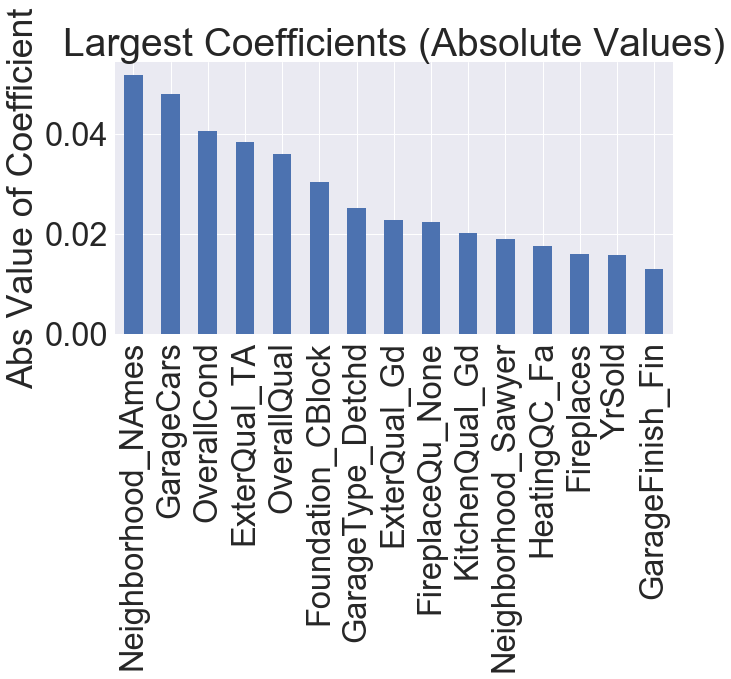

In [65]:
#plotting the coefficients will show which ones have the greatest effect on sale price of the homes
#we use the absolute value here because we are interested in seeing which ones have the greatest effect, not necessarily postive or negative
coefficients = np.abs(enet.coef_)
series_coef = pd.Series(np.abs(enet.coef_),index = x_train.columns)
largest_coef = series_coef.nlargest(n=15)
largest_coef.plot(kind='bar',title = "Largest Coefficients (Absolute Values)",figsize=(10,5))
plt.ylabel('Abs Value of Coefficient')

## Random Forest

Random forest follows a different structure than the models used above, so it should provide a nice comparison with the ones previously tested

In [66]:
#Basically the same setup as all the ones before, just this time using the RF regressor
fore = RandomForestRegressor()
for_params = {"n_estimators": [100,500,1000], "max_depth": [3,5,8,10,12,13,15]}
gridsearch3 = GridSearchCV(fore,param_grid=for_params, cv=3, scoring='neg_mean_squared_error')
gridsearch3.fit(scale,y_train)
print("Ideal Parameters: {}".format(gridsearch3.best_params_))

Ideal Parameters: {'max_depth': 8, 'n_estimators': 100}


In [67]:
#estimate for forest model
y_pred_train = gridsearch3.predict(x_train)
y_pred_test = gridsearch3.predict(x_test)
print(y_pred_train, y_pred_test)

[ 11.83538138  11.7416429   11.9085778   11.85548389  11.86222939
  11.86443526  11.82040696  11.94258972  11.8635647   11.87572009
  11.92800774  11.86309672  11.91528337  11.8635647   11.89187364
  11.86751823  11.92322859  11.83321429  11.86176419  11.85850354
  11.82593835  11.85881565  11.75638087  11.92603569  11.88233061
  11.8758567   11.91720964  11.74907187  11.83540408  11.91214324
  11.9453985   11.83297694  11.87224134  11.83063378  11.9235452
  11.83538138  11.87611789  11.86145208  11.91659697  11.83537248
  11.7526451   11.95553176  11.83538138  11.91468548  11.9263752
  11.8693359   11.95296576  11.91720964  11.73678324] [ 11.91720964  11.83514403  11.93010853  11.95042426  11.85227122
  11.8591634   11.85881565  11.87539536  11.89728707  11.91720964
  11.89781545  11.93741694  11.77307796  11.95296576  11.86905204
  11.93741694  11.93741694  11.74662958  11.9110598   11.87609808
  11.80380504  11.94538784]


In [68]:
#RMSE for Forest model
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.00417819276540085
Test MSE: 0.04851282717241601


## Kaggle Prediction

I will use the random forest model because the estimate is the best of all my models

In [69]:
predictors = kitties_puppies2[['Id','LotArea', 'YearBuilt','OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFullBath',
'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces','GarageCars', 'LotFrontage', 'GrLivArea', 
'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'Neighborhood_BrDale','Neighborhood_BrkSide',
'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR',
'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_SWISU',
'Neighborhood_Sawyer','Neighborhood_SawyerW','HouseStyle_1Story','HouseStyle_2Story', 
'Exterior1st_BrkFace','Exterior1st_CemntBd','Exterior1st_HdBoard', 
'Exterior2nd_CmentBd','Exterior2nd_HdBoard', 'ExterQual_Gd','ExterQual_TA','Foundation_BrkTil',
'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtExposure_Mn',
'BsmtExposure_No', 'BsmtFinType1_BLQ' , 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ' ,  'HeatingQC_Fa', 'HeatingQC_Gd',
'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_None', 'GarageType_BuiltIn',
'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None','GarageFinish_Fin', 'GarageFinish_None' ]]



In [73]:
#Getting the columns and arrays to match, and formatting it for the CSV file upload on Kaggle
final = np.exp(gridsearch3.predict(predictors))
ID = np.array(predictors['Id'], dtype=int)
print(final)
final10 = pd.DataFrame({"ID": ID, "SalePrice": final})
final10

[ 147631.08913795  149126.22422177  154483.41626326 ...,  152297.23810536
  134333.88645739  151280.42013653]


,ID,SalePrice
0,1461,147631.089138
1,1462,149126.224222
2,1463,154483.416263
3,1464,153345.990918
4,1465,149376.739991
5,1466,154121.249527
6,1467,150372.785806
7,1468,153495.201627
8,1469,152966.854341
9,1470,147631.089138


In [ ]:
final10.to_csv("kaggle3.csv", index=False)

I submitted my results to Kaggle and got a score of 0.42593. This shows that there are some errors in my model. Mainly when I cleaned the outliers out of the train dataset it caused some major issues with the cross-validation process. I spent hours trying to find the error, re-running my code and changing things up but to no avail. This score is in the bottom 4.5% of the Kaggle competition.. It means I did better than 4.49% of people.

Zillow should not use this model because it would be very costly to consumers. A model as inaccurate as mine would be worse than just an average Joe on the street telling you what he thinks your house is worth. 